In [1]:
%load_ext autoreload
%autoreload 2

In [924]:
from infer import *
import notebook_utils as nutils
import cv2
import os
import time
import matplotlib.pyplot as plt
from sort.sort import *
from tqdm import tqdm

classes = ['BAO CAM']
predictor = get_predictor("baocam.pth", classes, 550 , 0.98)

file = 'BAOCAM/6/7.JPG'
bboxes, classes, scores, v = infer('baocam', predictor, file, True, 0.5)

In [26]:
nutils.gdrive_down("1f6-Focz7eiRxia38H8nSxvghd5eAJxne", "CPL_FGAGro_38_63-20200917-070419.mp4")

Downloading...
From: https://drive.google.com/uc?id=1f6-Focz7eiRxia38H8nSxvghd5eAJxne
To: /home/haotruong/Cam/CPL_FGAGro_38_63-20200917-070419.mp4
55.2MB [00:05, 11.0MB/s]


In [269]:
mp4_files = nutils.list_files("data", "CAM 1-*.mp4")
path = mp4_files[0]

In [270]:
from pathlib import Path

In [271]:
mp4_files = [Path("CPL_FGAGro_38_63-20200917-070419.mp4")]
path = mp4_files[0]

In [272]:
time_per_frame = (1/30) * 1000

In [930]:
for path in mp4_files:
    out = cv2.VideoWriter("temp.mp4",cv2.VideoWriter_fourcc(*'MP4V'), 15, (285, 360)) #(640, 360)
    
    vc = cv2.VideoCapture(str(path))

#     start_frame = 10800#12600 #10800
    vc.set(1,0);

    rval = True

    frame_id = 0
    max_frame = int(vc.get(cv2.CAP_PROP_FRAME_COUNT))
#     max_frame = 400
    counter = 0

    pbar = tqdm(total=max_frame, position=0, leave=True)
    
    mot_tracker = Sort(max_age=0, min_hits= 0)
    mot_tracker.reset_count()
    while rval:
        rval , frame = vc.read()

        if rval:
            start = time.time()

            image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            image = image[..., 350:920, :].copy()
            
            bboxes, classes, scores, v = infer('baocam', predictor, image, True, 0.5)
#             print(scores)
#             ret, bboxes = process_stick_two_object(bboxes, 550)

            track_bbs_ids = mot_tracker.update(bboxes)

            total_time = (time.time() - start) * 1000

#             v.draw_text(str(int(frame_id)), (100, 100), font_size= 30, color='g')

            for bbox in bboxes:
                v.draw_box(bbox, alpha = 1)

            for bbox in track_bbs_ids:
                counter = bbox[-1]
                v.draw_text(str(int(counter)), (int( (bbox[0] + bbox[2]) /2 ) , int((bbox[1] + bbox[3]) /2 )), font_size= 70, color='g')
#                 v.draw_text(str(int(bbox[3] - bbox[1])), (int( (bbox[0] + bbox[2]) /2 ) , int(-50 + (bbox[1] + bbox[3]) /2 )), font_size= 40, color='g')


            v.draw_text(str(int(counter)) + ("*" if False else ""), (40 , 20), font_size= 50, color='g')

            predicted_image = v.output.get_image()

            skip_frame = int(np.ceil(total_time / time_per_frame))
            skip_frame = 3
#             print(skip_frame)
            out.write(predicted_image)

            frame_id += 1
            pbar.update(1)
            
            for i in range(skip_frame):
                out.write(predicted_image)
                vc.read()
                pbar.update(1)
                frame_id += 1

            if frame_id > (max_frame - 0):
                break

    out.release()
    vc.release()

    new_file = "{}_export.mp4".format(path.stem).replace(" ", "") 
    cmd = "ffmpeg -i temp.mp4 -vcodec libx264 {} -y".format(new_file)
    print(cmd)
    os.system(cmd)

100%|█████████▉| 4265/4269 [01:16<00:00, 60.21it/s]

ffmpeg -i temp.mp4 -vcodec libx264 CPL_FGAGro_38_63-20200917-070419_export.mp4 -y


4272it [01:29, 60.21it/s]                          

In [928]:
from IPython.display import Video

Video(new_file, width = 400)


4271it [01:52, 46.52it/s]                          

In [453]:
Video("CPL_FGAGro_38_63-20200917-070419.mp4", width = 800)

304it [00:16, 51.89it/s]                         

In [85]:
out.release()
vc.release()

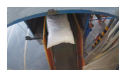

In [3]:
v.draw_box(bboxes[0])

out = v.output.get_image()

nutils.imshow(out, 2)

In [8]:
vc = cv2.VideoCapture(str(path))

start_frame = 12640
vc.set(1,start_frame);

mot_tracker = Sort(min_hits= 0) 
mot_tracker.reset_count()
counter = 0

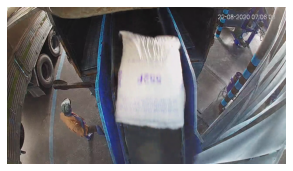

In [22]:
rval , frame = vc.read()

nutils.imshow(frame, 5)

In [23]:
cv2.imwrite("1.jpg", frame)

True

In [446]:
def process_stick_two_object(bboxes, thresh):
    a = bboxes.copy()
    
    max_height_to_split = thresh

    long_indices = np.where(a[:, 3] - a[:, 1] > max_height_to_split)[0]

    split_bboxes = []
    ret = False
    if len(long_indices) >0:
        print('There stick bboxes')
        ret = True
        for i in range(len(a)):
            if len(np.where(long_indices == i)[0]) > 0:
                bbox = a[i]
                center_height = bbox[3] - bbox[1]
                center_height *= 0.7

                split_bboxes.append([bbox[0], bbox[1], bbox[2], center_height])
                split_bboxes.append([bbox[0], center_height, bbox[2], bbox[3]])
            else:
                split_bboxes.append(a[i])
        
        a = np.array(split_bboxes)
    
    return ret, a
    

In [846]:
vc = cv2.VideoCapture(str(path))
vc.set(1, 4000);
mot_tracker = Sort(max_age = 0, min_hits= 0)
mot_tracker.reset_count()

In [847]:
counter = 0

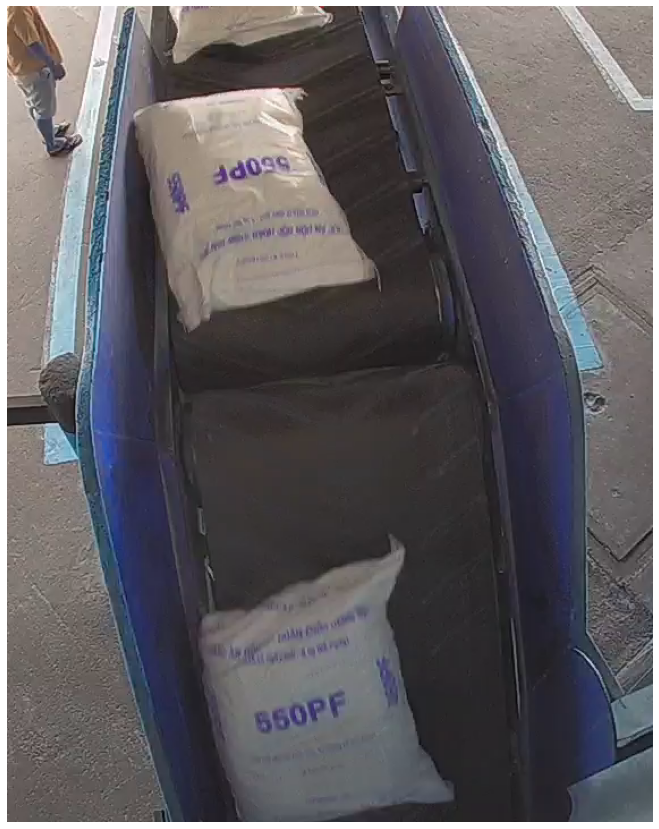

In [851]:
nutils.imshow(frame[..., 350:920, :])

In [855]:
classes = ['BAO CAM']
predictor = get_predictor("baocam.pth", classes, 400 , 0.9)


[[100.43746 229.66447 426.4625  580.22797]] [0.99900323]


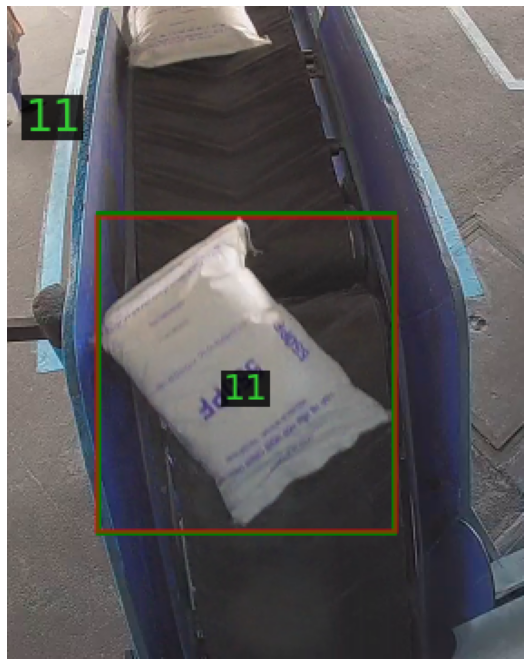

In [894]:
rval , frame = vc.read()
start = time.time()

image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
image = image[..., 350:920, :].copy()

bboxes, classes, scores, v = infer('baocam', predictor, image, True, 0.5)

print(bboxes, scores)
# ret, bboxes = process_stick_two_object(bboxes, 530)
# print(bboxes)

track_bbs_ids = mot_tracker.update(bboxes)


for bbox in bboxes:
    v.draw_box(bbox, 1)
    
    
for bbox in track_bbs_ids:
    v.draw_box(bbox[:4], edge_color='r')
    v.draw_text(str(int(bbox[-1])), (int( (bbox[0] + bbox[2]) /2 ) , int((bbox[1] + bbox[3]) /2 )), font_size= 40, color='g')

try:
    counter = max(track_bbs_ids[..., -1])
except:
    pass
v.draw_text(str(int(counter)), (50 , 100), font_size= 50, color='g')

predicted_image = v.output.get_image()

total_time = (time.time() - start) * 1000

skip_frame = int(np.ceil(total_time / time_per_frame))


for i in range(skip_frame):
    vc.read()
    
nutils.imshow(predicted_image, 12)

In [406]:
process_stick_two_object(a)

0
[[475.5481, 107.80378, 801.6652, 597.5281200000001], [475.5481, 597.5281200000001, 801.6652, 705.3319]]


array([[475.5481 , 107.80378, 801.6652 , 597.52812],
       [475.5481 , 597.52812, 801.6652 , 705.3319 ]])

In [405]:
a = np.array([[475.5481 , 107.80378, 801.6652 , 705.3319 ]])

In [505]:
max_height_to_split = 500

long_indices = np.where(a[:, 3] - a[:, 1] > max_height_to_split)[0]

split_bboxes = []

if len(long_indices) >0:
    for i in range(len(a)):
        if len(np.where(long_indices == i)[0]) > 0:
            bbox = a[i]
            center_height = bbox[3] - bbox[1]
            center_height *= 0.7
            
            split_bboxes.append([bbox[0], bbox[1], bbox[2], center_height])
            split_bboxes.append([bbox[0], center_height, bbox[2], bbox[3]])
        else:
            split_bboxes.append(a[i])
        print(i)
        print(split_bboxes)
            
        
a = np.array(split_bboxes)
    

SyntaxError: invalid syntax (<ipython-input-505-7d94d2879fb3>, line 14)

In [399]:
range(len(a))

range(0, 2)

In [401]:
a

array([[475.5481 , 107.80378, 801.6652 , 597.52812],
       [475.5481 , 597.52812, 801.6652 , 705.3319 ],
       [475.5481 , 107.80378, 801.6652 , 500.3319 ]])